In [1]:
import pandas as pd
import numpy as np
import os
from xicor.xicor import Xi
from xicor.xicor_pandas import XiPandas

import seaborn as sns

In [2]:
x1 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
x2 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]


In [22]:
%%timeit -o
# the -o outputs the TimeitResult

xi_cls = Xi(x1, x2)
xi_cls.correlation

1.11 ms ± 47.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


<TimeitResult : 1.11 ms ± 47.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)>

In [23]:
scipy_timeit = _

In [24]:
%%timeit -o
# the -o outputs the TimeitResult


xi_cls = XiPandas(x1, x2)
xi_cls.correlation

19.2 ms ± 1.87 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<TimeitResult : 19.2 ms ± 1.87 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>

In [25]:
pandas_timeit = _

In [26]:
pandas_timeit

<TimeitResult : 19.2 ms ± 1.87 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>

In [39]:
# scipy_timeit??

In [42]:
scipy_timings = pd.Series(scipy_timeit.timings, name='dt').to_frame()
scipy_timings['implementation'] = 'scipy'
scipy_timings

,dt,implementation
0,0.001033,scipy
1,0.001138,scipy
2,0.001056,scipy
3,0.001178,scipy
4,0.001135,scipy
5,0.001119,scipy
6,0.001143,scipy


In [43]:
pandas_timings = pd.Series(pandas_timeit.timings, name='dt').to_frame()
pandas_timings['implementation'] = 'pandas'
pandas_timings

,dt,implementation
0,0.018313,pandas
1,0.017654,pandas
2,0.017368,pandas
3,0.017330,pandas
4,0.022418,pandas
5,0.021121,pandas
6,0.019888,pandas


In [47]:
timings = pd.concat([pandas_timings, scipy_timings])
timings['dt_ms'] = timings['dt'] * 1000
timings


,dt,implementation,dt_ms
0,0.018313,pandas,18.312637
1,0.017654,pandas,17.653908
2,0.017368,pandas,17.367624
3,0.017330,pandas,17.330266
4,0.022418,pandas,22.418245
5,0.021121,pandas,21.121437
6,0.019888,pandas,19.888189
0,0.001033,scipy,1.033354
1,0.001138,scipy,1.137881
2,0.001056,scipy,1.055850


/Users/olgabot/opt/anaconda3/envs/xicor/lib/python3.9/site-packages/seaborn/categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


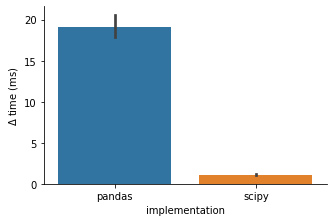

In [56]:
g = sns.catplot(data=timings, x='implementation', y='dt_ms', kind='bar', aspect=1.5, size=3)
g.set(ylabel='$\Delta$ time (ms)')
g.savefig('../../paper/pandas_vs_scipy_implementation.pdf')
g.savefig('../../paper/pandas_vs_scipy_implementation.svg')
g.savefig('../../paper/pandas_vs_scipy_implementation.png')

In [13]:
home = os.path.expanduser("~")
cell_csv_to_test = os.path.join(home, "czbiohub", "xicor", "tests", "random_lung_cells_for_profiling_pyxi.csv")

In [14]:
data = pd.read_csv(cell_csv_to_test)
nonzero_data = data.loc[:, (data != 0).all()]

In [29]:
x1 = nonzero_data.loc[0, :].values.tolist()[1:]
x2 = nonzero_data.loc[1, :].values.tolist()[1:]

In [30]:
print(len(x1))
print(len(x2))
for i in x1:
    print(i, type(i))
    break

949
949
1.0 <class 'numpy.float64'>


In [35]:
%%timeit

xi_cls = Xi(x1, x2)
corr = xi_cls.correlation
print(corr)

0.3202755913851325
0.3081302231918044
0.3037290215934929
0.3304461749578905
0.3087589662772774
0.3314114284271378
0.2933060552329043
0.31808384612239204
272 ms ± 11.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
%%timeit

xi_cls = XiPandas(x1, x2)
corr = xi_cls.correlation
print(corr)

0.2986016660091423
0.3152545022377633
0.30531416261179833
0.30210845842952727
0.3215286497878712
0.33498020960242847
0.32715191541146815
0.3177916134206933
7.97 s ± 1.41 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
